Paramètres de la loi log-normale ajustée : sigma=0.7546627403569917, loc=-0.47470413430415187, scale=14.2261786248596


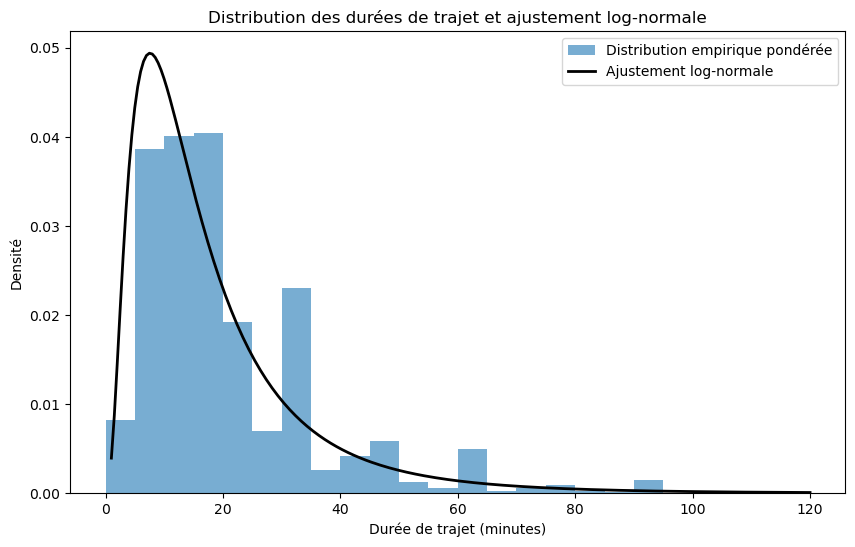

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    """Charge et prépare les données."""
    data = pd.read_csv(filepath, sep=';', encoding='ISO-8859-1', decimal=',')
    return data

def calculate_trip_durations(data):
    """Calcule les durées de trajet en minutes."""
    def convert_to_minutes(start_time_str, end_time_str):
        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
        end_time = datetime.strptime(end_time_str, '%Y-%m-%d %H:%M:%S')
        if end_time < start_time:
            end_time = datetime(year=start_time.year, month=start_time.month, day=start_time.day, hour=23, minute=59)
        duration = (end_time - start_time).total_seconds() / 60.0
        return duration

    data['TEMPS_TRAJET_MIN'] = data.apply(lambda row: convert_to_minutes(row['INSTANT_DEPART'], row['INSTANT_ARRIVEE']), axis=1)
    return data

def filter_data(data):
    """Filtre les données pour les trajets de moins de 120 minutes et strictement positifs."""
    return data[(data['TEMPS_TRAJET_MIN'] < 120) & (data['TEMPS_TRAJET_MIN'] > 0)]

def fit_and_plot_distributions(data):
    """Affiche la distribution empirique et ajuste la loi log-normale."""
    temps_trajet_clean = data['TEMPS_TRAJET_MIN']
    poids = data['POND_JOUR']
    
    plt.figure(figsize=(10, 6))
    plt.hist(temps_trajet_clean, bins=range(0, 121, 5), weights=poids, density=True, alpha=0.6, label='Distribution empirique pondérée')
    
    # Ajuster et afficher la distribution log-normale
    params = stats.lognorm.fit(temps_trajet_clean)
    sigma, loc, scale = params
    print(f"Paramètres de la loi log-normale ajustée : sigma={sigma}, loc={loc}, scale={scale}")
    
    x = np.linspace(1, 120, 240)  # Éviter 0 pour la distribution log-normale
    pdf = stats.lognorm.pdf(x, sigma, loc=loc, scale=scale)
    plt.plot(x, pdf, 'k', linewidth=2, label='Ajustement log-normale')
    
    plt.title('Distribution des durées de trajet et ajustement log-normale')
    plt.xlabel('Durée de trajet (minutes)')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

# Chemin correct du fichier
filepath = '/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv'
data = load_and_prepare_data(filepath)
data = calculate_trip_durations(data)
data = filter_data(data)
fit_and_plot_distributions(data)
